<a href="https://colab.research.google.com/github/RodrigoRoman/machine_learning_abc/blob/main/principal_component_analysis_default_payments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

## Importing the libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [24]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
dataset = pd.read_csv(path)


<h3>Cleaning the data</h3>

In [25]:
from scipy import stats

#instancia de base de datos que sera rellenada
filledDataset = dataset.copy()

for i in range(len(filledDataset.columns)):
  #Tomamos una fraccion aleatorea de los valores para poder probar su normalidad
  currentColumn = filledDataset.iloc[500:1000,i]
  #Calculamos la prueba de Shapiro-Wilk para saber si la distribucion de los datos es normal
  shapiro_test = stats.shapiro(currentColumn.to_numpy())

  if(shapiro_test.pvalue > 0.05):
      #Rellenamos los valores nulos con el promedio en caso de que la distribucion no sea normal
      filledDataset.iloc[:,i].fillna(currentColumn.mean(),inplace = True)
  else:     
      #Rellenamos los valores nulos con la media en caso de que la distribucion no sea normal
      filledDataset.iloc[:,i].fillna(currentColumn.median(),inplace = True)

## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Escalar los datos con standarizacion
sc = StandardScaler()
scaledData = sc.fit_transform(filledDataset)

#Realizamos la extraccion de componentes principales
pca = PCA()
pca.fit(scaledData)
pcaData = pca.transform(scaledData)

<h2>Calular el porcentaje de variacion que aporta cada componente principal</h2>

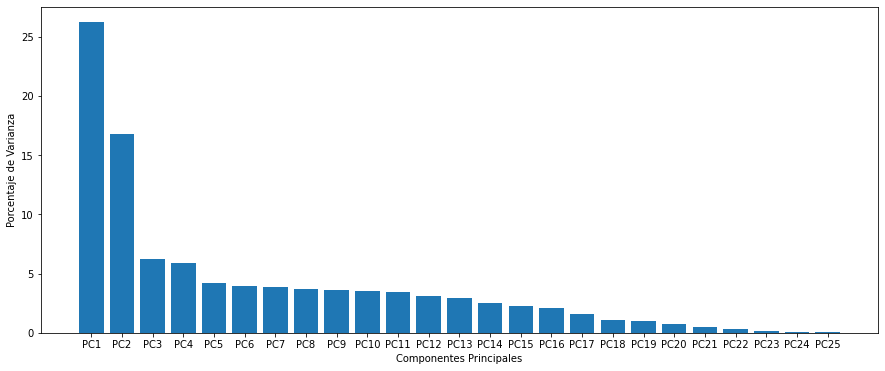

In [54]:
pcaVariations = np.round(pca.explained_variance_ratio_ *100,decimals = 2)

#Generamos etiquetas para realizar una visualizacion de nuestros componentes principales
labels = ['PC'+str(x) for x in range(1,len(pcaVariations)+1)]
plt.figure(figsize=(15, 6))

plt.bar(x=range(1,len(pcaVariations)+1),height = pcaVariations,tick_label = labels)
plt.ylabel('Porcentaje de Varianza')
plt.xlabel('Componentes Principales')
plt.show()



<h3>Plot de PCA</h3>

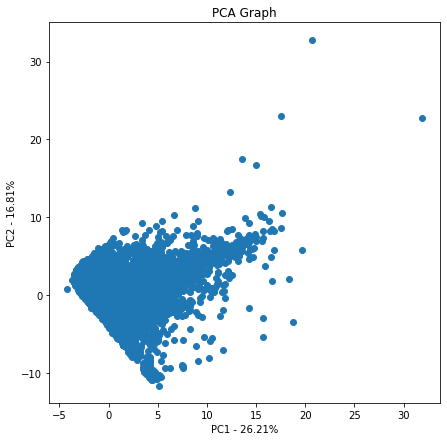

In [55]:
pcaDF = pd.DataFrame(pcaData,columns = labels)
plt.figure(figsize=(7, 7))
plt.scatter(pcaDF.PC1,pcaDF.PC2)
plt.title('PCA Graph')
plt.xlabel('PC1 - {0}%'.format(pcaVariations[0]))
plt.ylabel('PC2 - {0}%'.format(pcaVariations[1]))
plt.show()


